# Analisys

### Loading data

In [1]:
import pandas as pd
df = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df['City_full'] = df[['City','State','Country',]].agg(', '.join, axis=1)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Days_delivery'] = (df['Ship Date'] - df['Order Date']).dt.days

In [2]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,City_full,Days_delivery
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,"Henderson, Kentucky, United States",3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,"Henderson, Kentucky, United States",3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,"Los Angeles, California, United States",4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"Fort Lauderdale, Florida, United States",7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,"Fort Lauderdale, Florida, United States",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,"Miami, Florida, United States",2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,"Costa Mesa, California, United States",5
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,"Costa Mesa, California, United States",5
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,"Costa Mesa, California, United States",5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

### Plotting different values to understand what is happening

From this barchart we can see that Technology is most sold in terms if earned money

The most profitable category is Technology


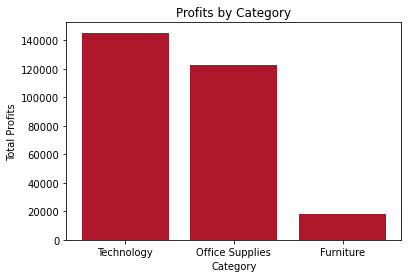

In [4]:
import matplotlib.pyplot as plt


# Calculate sum of profits for each category
category_sales = df.groupby('Category')['Profit'].sum().reset_index()

# Sort
category_sales = category_sales.sort_values('Profit', ascending=False)

# Printinting
most_profitable_category = category_sales.iloc[0]['Category']
print(f"The most profitable category is {most_profitable_category}")

# Create a barchart
plt.bar(category_sales['Category'], category_sales['Profit'],color='#AE1729')
plt.xlabel('Category')
plt.ylabel('Total Profits')
plt.title('Profits by Category')
plt.show()

The most profitable category is Technology


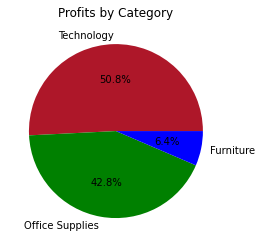

In [34]:
import matplotlib.pyplot as plt

# Calculate sum of profits for each category
category_sales = df.groupby('Category')['Profit'].sum().reset_index()

# Sort the categories by total sales
category_sales = category_sales.sort_values('Profit', ascending=False)

# Print the most profitable category
most_profitable_category = category_sales.iloc[0]['Category']
print(f"The most profitable category is {most_profitable_category}")

# Create a pie chart
plt.pie(category_sales['Profit'], labels=category_sales['Category'], autopct='%1.1f%%', colors = ['#AE1729','green','blue'])
plt.title('Profits by Category')
plt.show()

West is the region where with most sales

The most profitable region is West


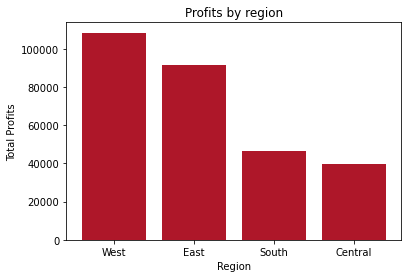

In [6]:

# Calculate total profits
region_sales = df.groupby('Region')['Profit'].sum().reset_index()

# Sorting
region_sales = region_sales.sort_values('Profit', ascending=False)

# Printing
most_profitable_region = region_sales.iloc[0]['Region']
print(f"The most profitable region is {most_profitable_region}")

# Create a barchart
plt.bar(region_sales['Region'], region_sales['Profit'],color='#AE1729')
plt.xlabel('Region')
plt.ylabel('Total Profits')
plt.title('Profits by region')
plt.show()

Most profitable cities

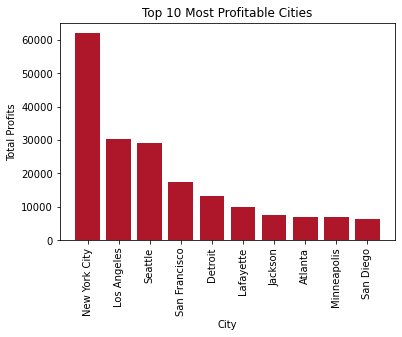

In [7]:
# City profits
city_sales = df.groupby('City')['Profit'].sum().reset_index()

# Sort the cities and get the top 10
top_cities = city_sales.sort_values('Profit', ascending=False).head(10)

# Create a barchart
plt.bar(top_cities['City'], top_cities['Profit'],color='#AE1729')
plt.xlabel('City')
plt.ylabel('Total Profits')
plt.xticks(rotation=90)
plt.title('Top 10 Most Profitable Cities')
plt.show()

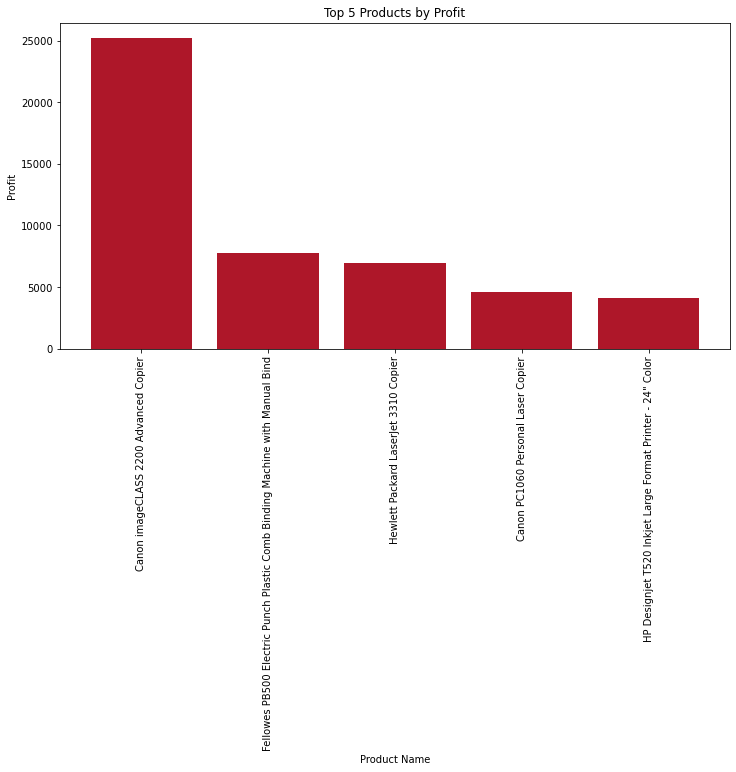

In [8]:
product_profit = df.groupby('Product Name')['Profit'].sum()

# Sort by profit in descending order
product_profit = product_profit.sort_values(ascending=False)

# Select the top 5 products by profit
top_products = product_profit.head(5)
plt.figure(figsize=(12, 6))
# Create a bar chart of the top 5 products and their corresponding profits
plt.bar(top_products.index, top_products.values,color='#AE1729')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation= 90)
plt.title('Top 5 Products by Profit')
plt.show()

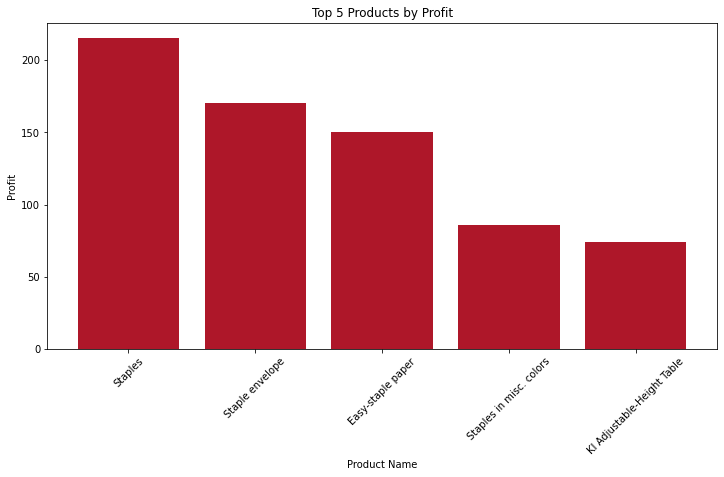

In [9]:
product_profit = df.groupby('Product Name')['Quantity'].sum()

# Sort by profit in descending order
product_profit = product_profit.sort_values(ascending=False)

# Select the top 5 products by profit
top_products = product_profit.head(5)
plt.figure(figsize=(12, 6))
# Create a bar chart of the top 5 products and their corresponding profits
plt.bar(top_products.index, top_products.values,color='#AE1729')
plt.xlabel('Product Name')
plt.ylabel('Profit')
plt.xticks(rotation= 45)
plt.title('Top 5 Products by Profit')
plt.show()

Looking at delivery time - we cant witness any significant sesoanal periods where delivery time goes up

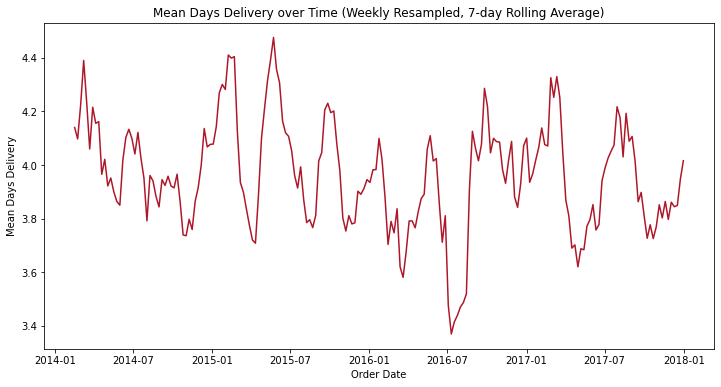

In [39]:
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Resample the data to a weekly frequency and calculate the mean
mean_days_delivery = df.set_index('Order Date').resample('W')['Days_delivery'].mean()

# Calculate a rolling 7-day average of the mean days delivery
rolling_mean = mean_days_delivery.rolling(window=7).mean()

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a line graph of the rolling mean days delivery over time
plt.plot(rolling_mean.index, rolling_mean.values,color='#AE1729')
plt.xlabel('Order Date')
plt.ylabel('Mean Days Delivery')
plt.title('Mean Days Delivery over Time (Weekly Resampled, 7-day Rolling Average)')
plt.show()

With profits we dont see the seosanality too

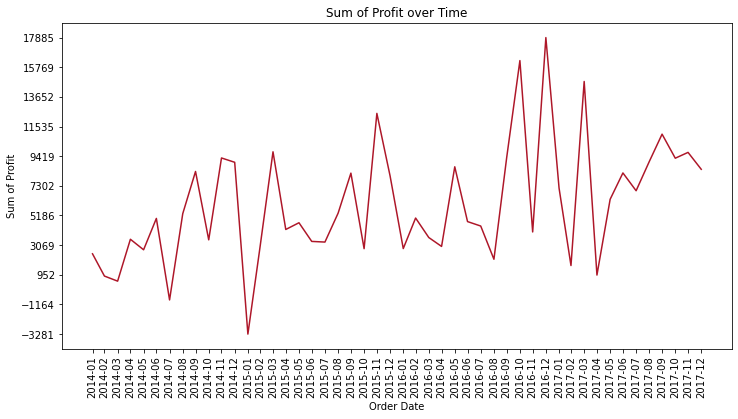

In [36]:
import numpy as np
# Resample the data to a monthly frequency and calculate the sum of profit
monthly_profit = df.set_index('Order Date').resample('M')['Profit'].sum()

# Calculate a rolling 7-day average of the monthly profit
rolling_monthly_profit = monthly_profit.rolling(window=1).mean()

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a line graph of the rolling sum of profit over time
plt.plot(rolling_monthly_profit.index, rolling_monthly_profit.values, color='#AE1729')
plt.xlabel('Order Date')
plt.ylabel('Sum of Profit')
yticks = np.linspace(monthly_profit.min(), monthly_profit.max(), num=11)
plt.yticks(yticks)
plt.title('Sum of Profit over Time')

# Format the x-axis labels to show all months and rotate the text by 45 degrees
plt.xticks(monthly_profit.index, monthly_profit.index.strftime('%Y-%m'), rotation=90)

plt.show()

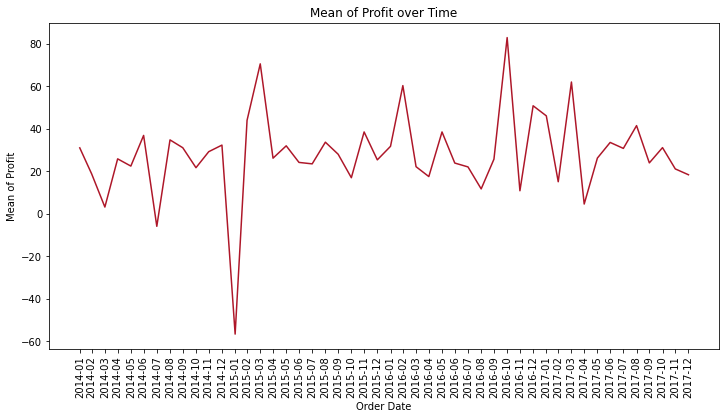

In [30]:
# Resample the data to a monthly frequency and calculate the sum of profit
monthly_profit = df.set_index('Order Date').resample('M')['Profit'].mean()

# Calculate a rolling 7-day average of the monthly profit
rolling_monthly_profit = monthly_profit.rolling(window=1).mean()

# Increase the size of the figure
plt.figure(figsize=(12, 6))

# Create a line graph of the rolling sum of profit over time
plt.plot(rolling_monthly_profit.index, rolling_monthly_profit.values, color='#AE1729')
plt.xlabel('Order Date')
plt.ylabel('Mean of Profit')
plt.title('Mean of Profit over Time')

# Format the x-axis labels to show all months and rotate the text by 45 degrees
plt.xticks(monthly_profit.index, monthly_profit.index.strftime('%Y-%m'), rotation=90)

plt.show()

In [13]:
import pandas as pd
df = pd.read_csv('DataGruppo2.csv', encoding='windows-1252')
df['City_full'] = df[['City','State','Country',]].agg(', '.join, axis=1)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df['Days_delivery'] = (df['Ship Date'] - df['Order Date']).dt.days

In [14]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,City_full,Days_delivery
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,"Henderson, Kentucky, United States",3
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,"Henderson, Kentucky, United States",3
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,"Los Angeles, California, United States",4
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"Fort Lauderdale, Florida, United States",7
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,"Fort Lauderdale, Florida, United States",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,"Miami, Florida, United States",2
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,"Costa Mesa, California, United States",5
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,"Costa Mesa, California, United States",5
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,"Costa Mesa, California, United States",5


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [16]:
df = df.drop(['Customer ID','Product ID','Order ID','Row ID','Ship Mode','Customer Name','Sub-Category','Postal Code'], axis=1)


In [17]:
df.head(6)

,Order Date,Ship Date,Segment,Country,City,State,Region,Category,Product Name,Sales,Quantity,Discount,Profit,City_full,Days_delivery
0,2016-11-08,2016-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,"Henderson, Kentucky, United States",3
1,2016-11-08,2016-11-11,Consumer,United States,Henderson,Kentucky,South,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,"Henderson, Kentucky, United States",3
2,2016-06-12,2016-06-16,Corporate,United States,Los Angeles,California,West,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,"Los Angeles, California, United States",4
3,2015-10-11,2015-10-18,Consumer,United States,Fort Lauderdale,Florida,South,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,"Fort Lauderdale, Florida, United States",7
4,2015-10-11,2015-10-18,Consumer,United States,Fort Lauderdale,Florida,South,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,"Fort Lauderdale, Florida, United States",7
5,2014-06-09,2014-06-14,Consumer,United States,Los Angeles,California,West,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694,"Los Angeles, California, United States",5
